In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [9]:
len(y_test)

45

In [11]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
lda = LinearDiscriminantAnalysis()

In [13]:
# обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [14]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 2,
       1])

In [15]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [16]:
result

,0,1
0,1,1
1,2,2
2,0,0
3,0,0
4,2,2
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


In [17]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [19]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.66278634e+00,  9.96297477e-03,  6.05135884e+00,
        -9.47998050e-01, -1.59171299e-02, -2.04314827e+00,
         4.22372588e+00,  2.06762011e+00, -4.95995781e-01,
        -6.80139263e-01,  1.69246458e+00,  4.56200182e+00,
         1.38044166e-02],
       [-1.71999593e+00, -9.57252898e-01, -6.62490079e+00,
         4.48687996e-01,  2.77548992e-02, -1.35378671e-01,
         1.74740758e+00,  4.72951093e+00,  9.94250890e-01,
        -6.71022615e-01,  3.75211444e+00, -9.58731382e-02,
        -7.80573287e-03],
       [-6.86667188e-01,  1.24080743e+00,  1.99132076e+00,
         4.58482779e-01, -1.87452121e-02,  2.42973558e+00,
        -6.94199998e+00, -8.46442877e+00, -7.53307098e-01,
         1.62738825e+00, -6.77266187e+00, -4.90452687e+00,
        -5.01275733e-03]])

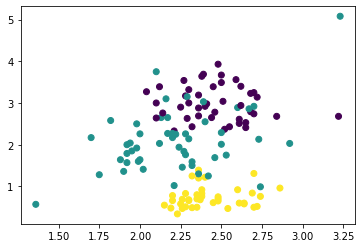

In [20]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [21]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

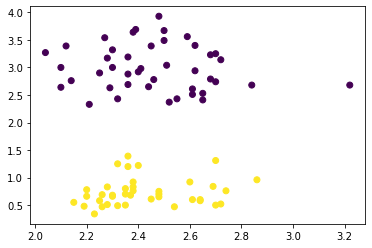

In [22]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [23]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [24]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.45767442, 2.99046512],
       [2.42435897, 0.73692308]])

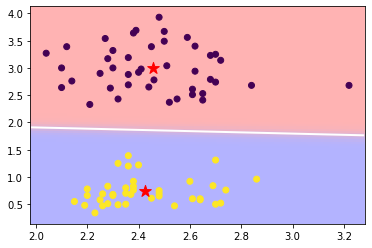

In [25]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [26]:
# второй признак в 9 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[ -2.10659758, -18.62899853]])

In [27]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [28]:
data[['flavanoids', 'ash']].corr()

,flavanoids,ash
flavanoids,1.000000,0.115077
ash,0.115077,1.000000


In [29]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая переменная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [32]:
lr.predict(small_test)

array([2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 2])

In [33]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [34]:
lr.coef_

array([[-0.06501411, -3.10808142]])

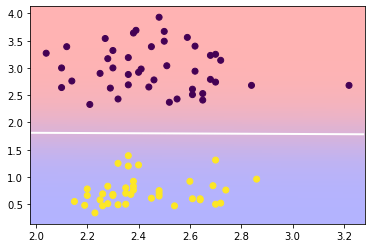

In [35]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [36]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [37]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [38]:
X

array([[  4.5160326 ,  13.33565808],
       [  3.56108664,  -9.95443332],
       [  2.04072408,  -8.03005716],
       [  3.09905953,  -9.75306926],
       [  3.77182675,   6.25654631],
       [ 10.35350273,   5.72803889],
       [  4.01891588,   7.40142336],
       [  3.4657592 , -11.21950438],
       [  5.02671992,   9.73506573],
       [  5.52914205, -13.34103886],
       [  8.04091016,  10.77864021],
       [  5.66578791,  11.96438505],
       [  1.52508998,  10.23189881],
       [  3.34719875,   7.84350318],
       [  6.22690432,   9.58550551],
       [  3.33457099, -13.07066228],
       [  6.8102872 ,  -9.54401106],
       [  6.46854894,   6.44160268],
       [  4.0675878 ,  11.84993519],
       [  6.22192758,   4.1629823 ],
       [  3.73617497,  -5.27185546],
       [ -0.44020072,  -4.89168641],
       [  1.97317607,  -6.09772417],
       [  5.46255726,  -7.89768031],
       [  3.72843937,   8.61541625],
       [  4.73880047,  -5.68863558],
       [  1.48217327, -13.29951397],
 

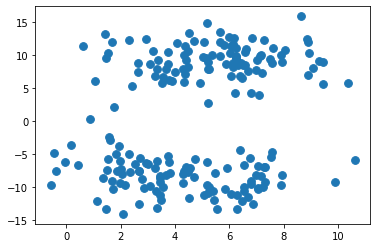

In [39]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [40]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [42]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.38366017e-01,  1.42524794e+00],
       [-5.49186524e-01, -1.12410174e+00],
       [-1.20325088e+00, -9.13458181e-01],
       [-7.47951916e-01, -1.10206029e+00],
       [-4.58525519e-01,  6.50363422e-01],
       [ 2.37293048e+00,  5.92512630e-01],
       [-3.52227061e-01,  7.75682464e-01],
       [-5.90196663e-01, -1.26257730e+00],
       [ 8.13331424e-02,  1.03112459e+00],
       [ 2.97476591e-01, -1.49480195e+00],
       [ 1.37804648e+00,  1.14535498e+00],
       [ 3.56262034e-01,  1.27514744e+00],
       [-1.42507816e+00,  1.08550829e+00],
       [-6.41201710e-01,  8.24072830e-01],
       [ 5.97655933e-01,  1.01475362e+00],
       [-6.46634210e-01, -1.46520634e+00],
       [ 8.48628932e-01, -1.07917663e+00],
       [ 7.01612145e-01,  6.70619821e-01],
       [-3.31288264e-01,  1.26261968e+00],
       [ 5.95514928e-01,  4.21200442e-01],
       [-4.73863018e-01, -6.11543495e-01],
       [-2.27055189e+00, -5.69929926e-01],
       [-1.23231023e+00, -7.01943662e-01],
       [ 2.

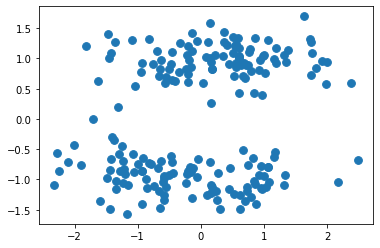

In [43]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [44]:
from sklearn.cluster import KMeans

In [57]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1])

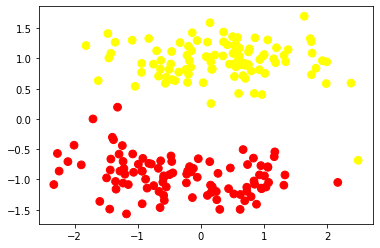

In [58]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [59]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

C:\Users\PC\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


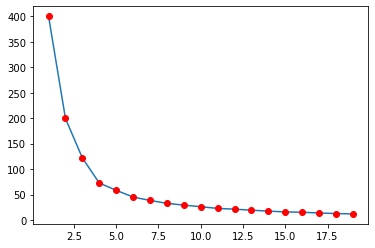

In [60]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [61]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

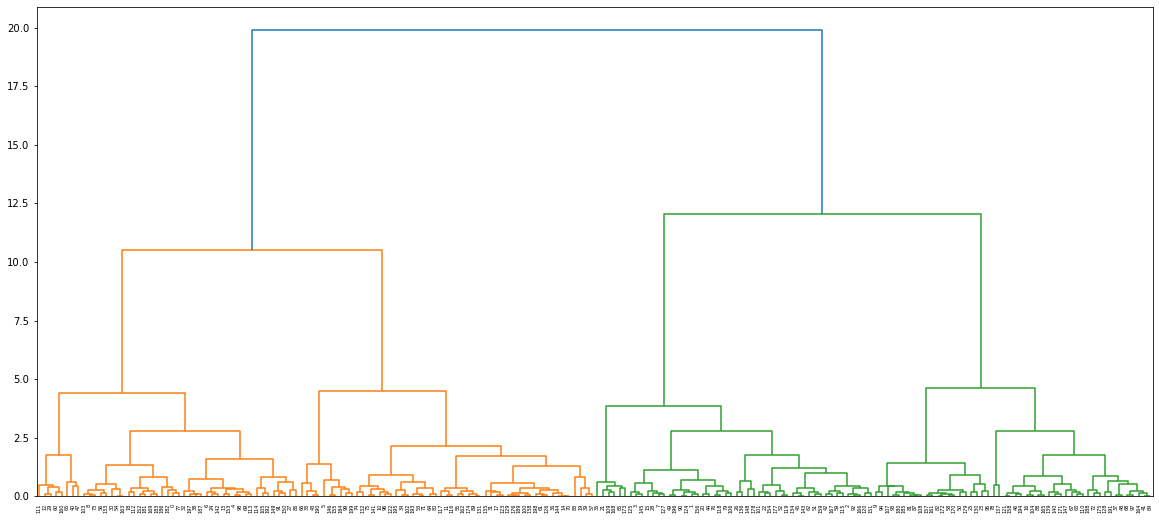

In [64]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [65]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [72]:
aglo = AgglomerativeClustering(n_clusters=2)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1], dtype=int64)

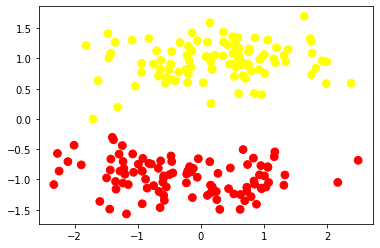

In [73]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

,0,1,y_hat
0,4.516033,13.335658,1
1,3.561087,-9.954433,0
2,2.040724,-8.030057,0
3,3.099060,-9.753069,0
4,3.771827,6.256546,1
...,...,...,...
195,6.823791,12.565830,1
196,3.802931,-7.826361,0
197,4.378599,7.090086,1
198,5.885672,8.592560,1
